In [ ]:
# -*- coding: utf-8
# Reinaldo Chaves (@paidatocandeira)
# Aula 5 - ANÁLISE EXPLORATÓRIA DE DADOS
# Prof. André Filipe de Moraes Batista, PhD.
#

In [2]:
import pandas as pd 
from google.colab import files

# Exercício 01

In [ ]:
'''
1. O conjunto de dados InsectSprays.csv possui dados de um pequeno 
experimento sobre o uso de inseticidas. Fazendo uso das técnicas de 
análise  exploratória  de  dados,  determine  qual  inseticida  parece  ser 
mais efetivo
'''

In [3]:
# carrega arquivo
uploaded = files.upload()

Saving InsectSprays.csv to InsectSprays.csv


In [4]:
# Ignora primeira coluna ao assumir que é indice
insetos = pd.read_csv('InsectSprays.csv', index_col=0)

In [5]:
insetos.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


In [6]:
insetos.describe()

,count
count,72.000000
mean,9.500000
std,7.203286
min,0.000000
25%,3.000000
50%,7.000000
75%,14.250000
max,26.000000


In [ ]:
# 72 linhas
# Mata em torno de 9.5 insetos
# Desvio padrão de 7.20 
# 25% dos experimentos matam até 3
# 50% dos experimentos matam até 7
# 75% dos experimentos matam até 14
# Máximo de 26 mortes

In [ ]:
insetos.groupby('spray').describe()

count                                                    
      count       mean       std  min    25%   50%    75%   max
spray                                                          
A      12.0  14.500000  4.719399  7.0  11.50  14.0  17.75  23.0
B      12.0  15.333333  4.271115  7.0  12.50  16.5  17.50  21.0
C      12.0   2.083333  1.975225  0.0   1.00   1.5   3.00   7.0
D      12.0   4.916667  2.503028  2.0   3.75   5.0   5.00  12.0
E      12.0   3.500000  1.732051  1.0   2.75   3.0   5.00   6.0
F      12.0  16.666667  6.213378  9.0  12.50  15.0  22.50  26.0

In [ ]:
insetos.groupby('spray').sum()

,count
spray,
A,174
B,184
C,25
D,59
E,42
F,200


In [ ]:
# Agrupa pelo tipo de spray e junto faz um describe - retorna todos os valores em função do spray
# Todos os sprays tiveram a mesma quantidade de testes, 12
# Há diferença de médias entre os sprays, desvio padrão baixo
# Então em tese o F tem a melhor média
# Mas a mediana mostra que o B estava melhor (50%)
# Pela soma o F matou mais - possibilidade de avaliação boa também
# Mas falta uma informação importante para melhor avaliar o desempenho, qual a população de mosquitos

# Exercício 02

In [ ]:
'''
2. O  conjunto  de  dados  NYCMarathon2002.csv  possui  uma  amostra 
aleatória dos corredores da maratona de Nova York em 2002. Faça 
uso de boxplots e histogramas para comparar o tempo de prova entre 
homens e mulheres. Qual das seguintes afirmações melhor descreve 
as diferenças? 
 
a) Homens e mulheres possuem distribuições similares; 
b) A maioria dos homens são mais rápidos que as mulheres; 
c) Homens e mulheres possuem distribuições assimétricas à direita, mas 
homens possuem 20 minutos de deslocamento à esquerda; 
d) Ambas as distribuições são normais com uma diferença de média de 
30 minutos. 
 
Justifique.  
 
Dica: a biblioteca Seaborn do Python faz gráficos ótimos. Busque por displot 
da Seaborn e veja se é válido utilizá-lo em sua análise.  
'''

In [7]:
uploaded = files.upload()

Saving nym2002.csv to nym2002.csv


In [8]:
nym = pd.read_csv('nym2002.csv', index_col=0)

In [ ]:
# Amostra de mil pessoas
# Posição que a pessoa chegou, gênero, idade, país, tempo de prova (minutos)

In [9]:
nym.head()

,place,gender,age,home,time
3475,3592,Male,52,GBR,217.483333
13594,13853,Female,40,NY,272.550000
12012,12256,Male,31,FRA,265.283333
10236,10457,Female,33,MI,256.150000
9476,9686,Male,33,NY,252.250000


In [10]:
import seaborn as sns

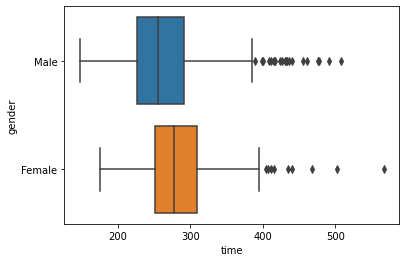

In [11]:
# Indica os dados
# x time
# y gender
sns.boxplot(data= nym, x = 'time' , y = 'gender');

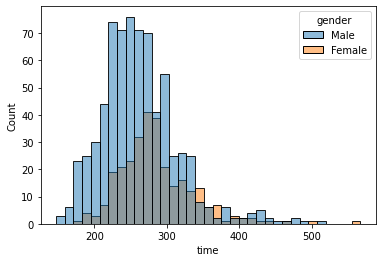

In [13]:
# Histograma do mesmo modo
# Com hue diferencio entre gênero
sns.histplot(data = nym, x = 'time', hue='gender')

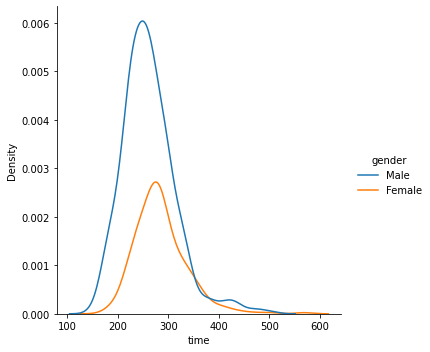

In [14]:
# kind kde - kernel density estimate, tenta ver a distribuição em uma única linha
# a linha indica densidade, quando você soma a linha inteira, vê a área abaixo, a área dá 1
# todos os homens e todas as mulheres
sns.displot(data = nym, x = 'time', hue='gender', kind='kde')

In [ ]:
# Boxplot resume muito bem
# Há uma sobreposição entre homens e mulheres próxima, nos caixotes
# Primeiro quartil, mediana, terceiro quartil, outliers

In [ ]:
# Para ser similiar, uma distribuição tem que ter média e desvio padrão próximos
# No boxplot já dá para ver que as medianas estão deslocadas - as mulheres têm uma assimetria a direita
# Apesar de existirem mais homens, como mostra o pico no displot

In [ ]:
# Agrupa por genero para mostrar agg com time com média, mediana e desvio padrão

In [15]:
nym.groupby('gender').agg({'time': ['mean', 'median', 'std']})

time                       
              mean      median        std
gender                                   
Female  284.936644  277.725000  51.423581
Male    261.820904  256.016667  52.984902

In [16]:
nym.groupby('gender')[['time']].describe()

time                         ...                                  
        count        mean        std  ...         50%       75%         max
gender                                ...                                  
Female  292.0  284.936644  51.423581  ...  277.725000  309.4625  566.783333
Male    708.0  261.820904  52.984902  ...  256.016667  290.6375  508.083333

[2 rows x 8 columns]

In [ ]:
# A mediana e a média não estão iguais
# Mulheres têm média maior
# Mediana das mulheres está maior do que dos homens

In [ ]:
# Curva assimétrica a direita - nas linhas e outliers
# Poucas pessoas fizeram em muito tempo
# próximo de 20 minutos de deslocamento à esquerda - nos gráficos e na média (284-261) ou na mediana (277-256)

In [ ]:
# As duas distribuições não são normais
# Não tem diferença de 30 minutos - 284-264

# Questão 03

In [ ]:
3. Calcule  o  coeficiente  de  correlação  entre  idade  e  sexo  para  os 
corredores. O que você pode entender desse resultado?

In [ ]:
#Correlação não é causa! - em muitas vezes

In [ ]:
# Coeficiente de correlação r
# Vai de -1 a 1 - correlação inexistente ou total

In [17]:
nym.corr()

,place,age,time
place,1.000000,0.146799,0.929343
age,0.146799,1.000000,0.189867
time,0.929343,0.189867,1.000000


In [ ]:
# Correlação entre idade e tempo é 0.18 - uma correlação baixa
# Sem ter esse número poderia verificiar isso com um gráfico de dispersão

In [18]:
import altair as alt

In [19]:
alt.Chart(nym).mark_point().encode(
    x = 'age',
    y = 'time',
    tooltip = ['age', 'time']
)

alt.Chart(...)

In [ ]:
# pontos estão espalhados
# sem uma linha diagonal aparente que una os pontos

# Exercício 04

In [ ]:
'''
4. Estratifique os corredores em grupos de idades (20-25, 25-30, etc.) 
e  gere  gráficos  de  dispersão  e  boxplot  para  cada  grupo,  avaliando 
então  como  se  dá  o  desempenho  (tempo  de  prova)  em  função  do 
grupo etário.  
 
Dica: A biblioteca pandas possui uma função chamada cut a qual permite 
criar grupos para uma variável. Esse link possui bons exemplos. Aproveite 
para se familiarizar com o StackOverflow.  
'''

In [ ]:
# https://stackoverflow.com/questions/45751390/pandas-how-to-use-pd-cut

In [ ]:
# define intervalos

In [20]:
bins = [0, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 100]
        

In [ ]:
# aplica os bins numa nova coluna

In [21]:
nym['age_group'] = pd.cut(nym['age'], bins= bins )

In [ ]:
# Indica em que grupo cada pessoa ficou
# ( é intervalo fechado e ] é intervalo aberto
# 50 não incluiu, a partir de 50 mais 1 / 56 não cabe aqui

In [22]:
nym.head()

,place,gender,age,home,time,age_group
3475,3592,Male,52,GBR,217.483333,"(50, 55]"
13594,13853,Female,40,NY,272.550000,"(35, 40]"
12012,12256,Male,31,FRA,265.283333,"(30, 35]"
10236,10457,Female,33,MI,256.150000,"(30, 35]"
9476,9686,Male,33,NY,252.250000,"(30, 35]"


In [ ]:
# O pandas trata essa nova coluna como category, mas muitas bibliotecas não entendem esse tipo de dado

In [23]:
nym['age_group'] = nym['age_group'].astype('str') ### precisamos converter para string, para aumentar compatbilidade 

In [24]:
nym.head()

,place,gender,age,home,time,age_group
3475,3592,Male,52,GBR,217.483333,"(50, 55]"
13594,13853,Female,40,NY,272.550000,"(35, 40]"
12012,12256,Male,31,FRA,265.283333,"(30, 35]"
10236,10457,Female,33,MI,256.150000,"(30, 35]"
9476,9686,Male,33,NY,252.250000,"(30, 35]"


In [25]:
nym.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 3475 to 8527
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   place      1000 non-null   int64  
 1   gender     1000 non-null   object 
 2   age        1000 non-null   int64  
 3   home       999 non-null    object 
 4   time       1000 non-null   float64
 5   age_group  1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 94.7+ KB


In [ ]:
# Boxplot de cada bin
# Na medida que a idade fica maior neste caso a mediana aumenta

In [26]:
alt.Chart(nym).mark_boxplot().encode(
    x = 'gender',
    y = 'time',
    column = 'age_group'
)

alt.Chart(...)

In [ ]:
# gráfico de dispersão separado por gênero e divididos pelos bins
# existem menos mulheres, o número de bolinhas é representativo
# alguns grupos são bem homogêneos
# em grupos de maior de idade, algumas pessoas foram mais rápidas

In [ ]:
alt.Chart(nym).mark_point().encode(
    x = 'age',
    y = 'time',
    color = 'age_group',
    column = 'gender'
)

alt.Chart(...)